### Lec 07

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

input layer has mean = 0.4998587174364797 and std 0.28833387103900027
hidden layer 0 has mean = 0.9999690814103676 and std 1.4297740897292104e-05
hidden layer 1 has mean = 0.999999999527769 and std 2.823402714413956e-10
hidden layer 2 has mean = 0.9999999995367047 and std 2.9813119775989125e-10
hidden layer 3 has mean = 0.9999999995518081 and std 2.7283929245964916e-10
hidden layer 4 has mean = 0.9999999995319359 and std 3.220445976246977e-10
hidden layer 5 has mean = 0.9999999995506763 and std 2.8656940443574465e-10
hidden layer 6 has mean = 0.9999999995409634 and std 2.6717962719096196e-10
hidden layer 7 has mean = 0.9999999995384986 and std 2.710879550853147e-10
hidden layer 8 has mean = 0.9999999995200847 and std 2.792113371493147e-10
hidden layer 9 has mean = 0.9999999995713451 and std 2.3642962647578944e-10


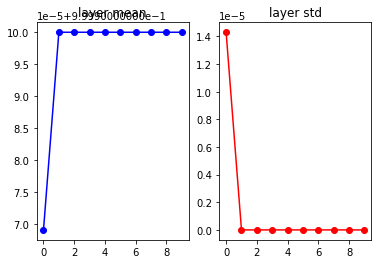

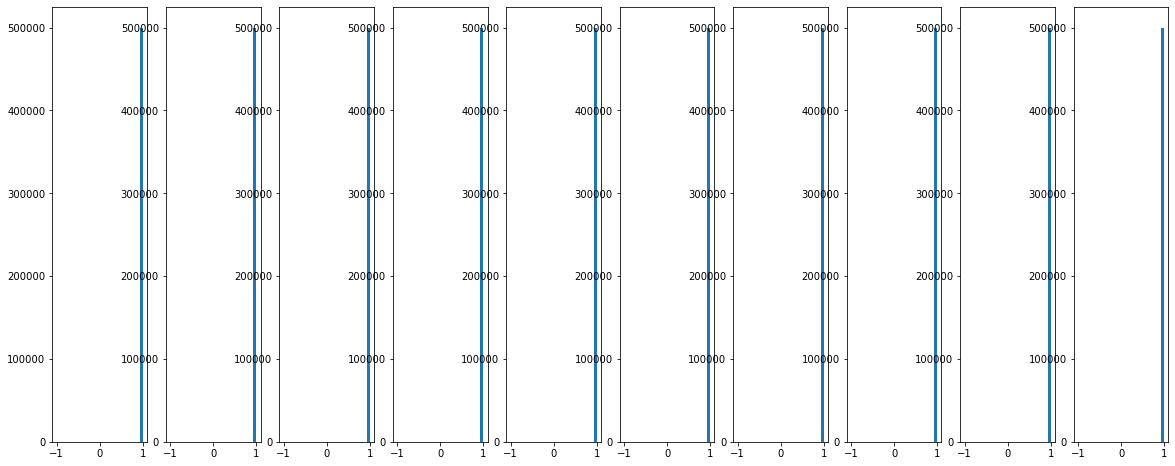

In [8]:
D = np.random.rand(1000, 500)

hidden_layer_size = [500] * 10

non_linearality = ['tanh'] * len(hidden_layer_size)

act = {'relu': lambda x : np.maximum(0, x), 'tanh': lambda x : np.tanh(x)} 

Hs = {}

for i in range(len(hidden_layer_size)):
    X = (D if i == 0 else Hs[i -1])
    
    fan_in = X.shape[1]
    fan_out = hidden_layer_size[i]
    
    # W = np.random.rand(fan_in, fan_out) * 0.01
    # W = np.random.rand(fan_in, fan_out) * 1.0
    W = np.random.rand(fan_in, fan_out) / np.sqrt(fan_in)
    
    H = np.dot(X , W)
    
    H = act[non_linearality[i]](H)
    
    Hs[i] = H
print(f"input layer has mean = {np.mean(D)} and std {np.std(D)}")

layer_means = [np.mean(H) for key, H in Hs.items()]
layer_std = [np.std(H) for key, H in Hs.items()]

for i, H in Hs.items():
    
    print(f"hidden layer {i} has mean = {np.mean(H)} and std {np.std(H)}")

plt.figure()
plt.subplot(121)
plt.plot(Hs.keys(), layer_means, 'ob-')
plt.title('layer mean')

plt.subplot(122)
plt.plot(Hs.keys(), layer_std, 'or-')
plt.title('layer std')


plt.figure(figsize=(20, 8))
for i, H in Hs.items():
    plt.subplot(1, len(Hs), i+ 1)
    plt.hist(H.ravel(), 30, range=(-1, 1))

- Initializing all the weights with zeros leads the neurons to learn the same features during training.
- Despite breaking the symmetry, initializing the weights with values (i) too small or (ii) too large leads respectively to (i) slow learning or (ii) divergence.